# Data imbalance analysis
## Comparing the impact of dataset imbalance on classification performance metrics
In this notebook, we are going to explore how data imbalance affect classification scores on four different tasks, which have been chosen to exemplify typical use cases of ML analysis in neuroscience. To keep it simple, we will focus on binary classification problems (0 vs 1).

The four tasks are : (/!\ to complete)
1. Synthetic data
2. EEG alpha oscillations (resting-state Eyes-Closed vs Eyes-Open)
3. MEG alpha oscillations (auditory vs visual stimulation)
4. MEG (faces vs scrambled) 

In these tasks, we will observe the effect of data imbalance on 5 different performance metrics :   
1. Decoding Accuracy (DA)  
2. Area Under the Curve (AUC)
3.
4.
5.

Finally, a few parameters of the classification pipeline must be kept in mind as they can also differentially impact performance on imbalanced data. Namely :
- Dataset size
- Classifier type
    - Support Vector Machine (SVM)
    - Linear Discriminant Analysis (LDA)
    - Logistic Regression (LR)
    - Random Forest (RF)
- Cross-validation scheme
    - K-Fold, k=5
    - Stratified K-Fold
    - Group K-Fold
    - Leave One Out (LOO)

## Imports
First, we start by importing functions from the provided toolbox as well as some useful plotting functions.

In [ ]:
from imbalance.pipeline import Pipeline
from imbalance.viz import metric_balance
import numpy as np
import matplotlib.pyplot as plt
import string

## Task 1 : Synthetic data
For that first classification task, we will generate data from two gaussian distributions, with means of 0 and 2.

In [27]:
# generate random data
n = 1000
x = np.concatenate(
    [np.random.normal(0, size=n // 2), np.random.normal(2, size=n // 2)]
).reshape(-1, 1)
y = np.concatenate([np.zeros(n // 2), np.ones(n // 2)]).astype(int)
groups = np.concatenate([np.arange(n // 2), np.arange(n // 2)]).astype(int)

# run the pipeline
pl = Pipeline(
    x,
    y,
    groups,
    dataset_balance=np.linspace(0, 1, 100)[1:-1],
    classifiers=["lr", "lda", "svm"],
    metrics=["roc_auc", "accuracy", "f1", "balanced_accuracy"],
)
pl.evaluate()

fitting classifiers: 100%|█| 1176/1176 [00:21<00:00, 55.00it/s, size=1, balance=0.99, classifier=SVC, metric=balanced_


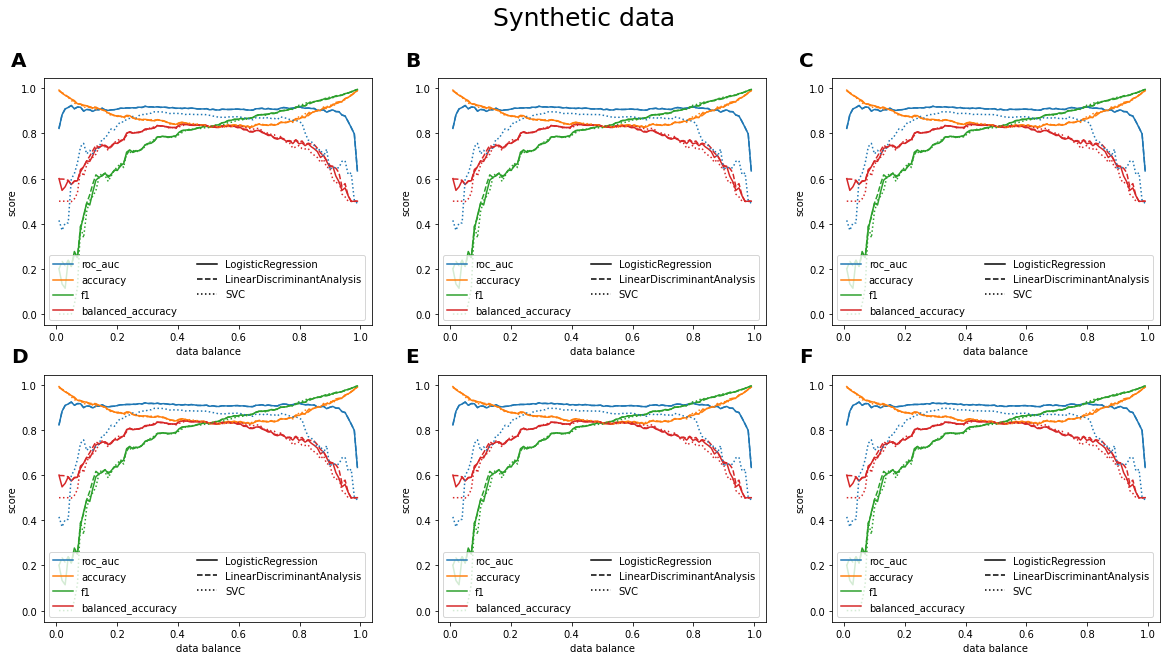

In [30]:
# visualize the result
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
figtitle = f"Synthetic data"
fig.suptitle(figtitle, fontsize=25)

for n,ax in enumerate(axes.flat):
    ax.text(-0.1, 1.05, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    metric_balance(pl, ax=ax, show=False)